In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("csv/val_stats.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85678 entries, 0 to 85677
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            64813 non-null  object 
 1   name              85674 non-null  object 
 2   tag               85358 non-null  object 
 3   rating            85678 non-null  object 
 4   damage_round      85678 non-null  float64
 5   headshots         85678 non-null  object 
 6   headshot_percent  85678 non-null  float64
 7   aces              85678 non-null  int64  
 8   clutches          85678 non-null  int64  
 9   flawless          85678 non-null  int64  
 10  first_bloods      85678 non-null  object 
 11  kills             85678 non-null  object 
 12  deaths            85678 non-null  object 
 13  assists           85678 non-null  object 
 14  kd_ratio          85678 non-null  float64
 15  kills_round       85678 non-null  float64
 16  most_kills        85678 non-null  int64 

C:\Users\jaya9\AppData\Local\Temp\ipykernel_21620\3062888750.py:1: DtypeWarning: Columns (0,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("csv/val_stats.csv")


In [7]:
# Convert data type from string to float
i = 0
for value in df.loc[:, "gun1_kills"]:
    value = float(str(value).replace(",", ""))
    df.loc[i, "gun1_kills"] = value
    i += 1

In [8]:
i = 0
for value in df.loc[:, "gun2_kills"]:
    value = float(str(value).replace(",", ""))
    df.loc[i, "gun2_kills"] = value
    i += 1

In [9]:
df.loc[:, ["gun1_kills", "gun2_kills"]]

,gun1_kills,gun2_kills
0,802.0,220.0
1,689.0,226.0
2,444.0,231.0
3,754.0,48.0
4,419.0,65.0
...,...,...
85673,190.0,175.0
85674,400.0,212.0
85675,373.0,159.0
85676,89.0,37.0


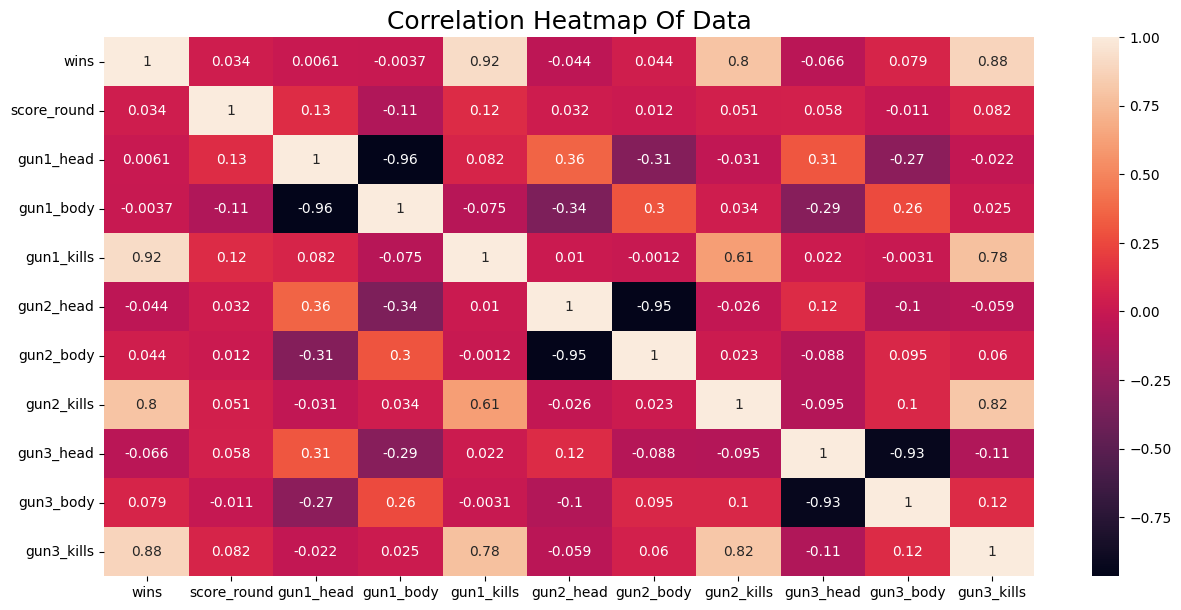

In [10]:
# correlation heapmap
fig, ax = plt.subplots(figsize=(15, 7))
plt.title("Correlation heatmap of data".title(),fontsize=18)
sns.heatmap(df[["wins", "score_round", "gun1_head", "gun1_body", "gun1_kills", "gun2_head", "gun2_body", "gun2_kills", "gun3_head", "gun3_body", "gun3_kills"]].corr(), annot=True)
plt.show()


In [11]:
played = df.loc[:, ["wins", "win_percent"]].copy()
played

,wins,win_percent
0,59,59.6
1,52,65.8
2,42,65.6
3,32,62.8
4,32,62.8
...,...,...
85673,32,76.2
85674,32,80.0
85675,26,52.0
85676,8,66.7


In [49]:
# count total games

played = df.loc[:, ["wins", "win_percent"]].copy()

i = 0
for data in enumerate(played.values):

    wins = data[1][0]
    percent = data[1][1]

    # percent = wins / x
    # x = wins / percent
    if percent == 0 or np.round(wins / (percent*0.01)) < 10:
        played.drop(
            index=data[0],
            inplace=True
        )
    else:
        played.loc[data[0], "total_games"] = np.round(wins / (percent*0.01))
    

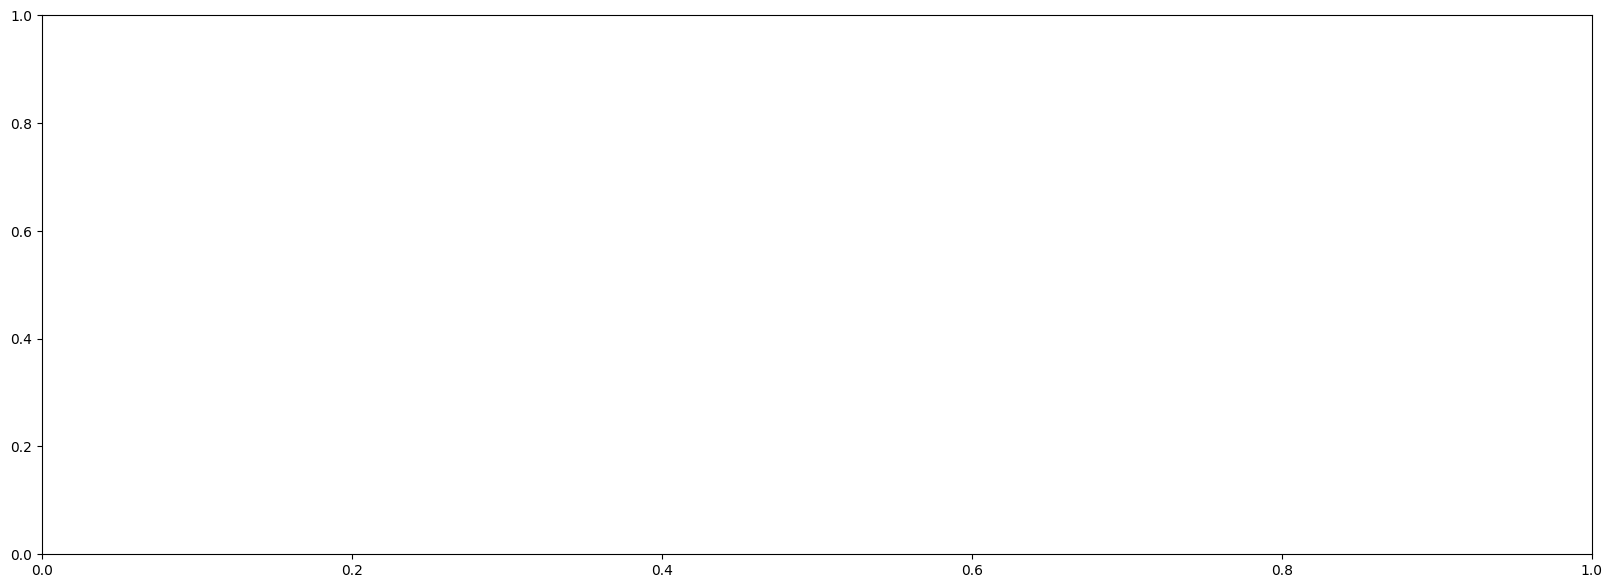

In [55]:
# Games played by rating type
#! but i can't find how to sort ratings by custom

ratAndGames = pd.concat([df["rating"], played["total_games"]], axis = 1)

fig, ax = plt.subplots(figsize = (20, 7))


In [58]:
ratings = ["Unrated", "Bronze 3", "Bronze 2", "Silver 3", "Silver 2", "Silver 1", "Gold 3", "Gold 2", "Gold 1", "Platinum 3", "Platinum 2", "Platinum 1", "Diamond 3", "Diamond 2", "Diamond 1", "Immortal 3", "Immortal 2", "Immortal 1", "Radiant"]
ratings_idx = [i for i in range(len(ratings))]
ratings_dict = dict(zip(ratings, ratings_idx))

for i in enumerate(ratAndGames.values):
    ratAndGames.loc[i[0], "rating"] = ratings_dict[ratAndGames.loc[i[0], "rating"]]


KeyError: 18

In [63]:
ratAndGames.value_counts(sort = False)

rating  total_games
1       21.0           1
        72.0           1
2       20.0           2
        23.0           1
        24.0           1
                      ..
18      246.0          2
        250.0          1
        257.0          1
        265.0          1
        274.0          1
Name: count, Length: 964, dtype: int64

In [65]:
ax.bar(
    ratAndGames["rating"],
    ratAndGames["total_games"],
    color = "skyblue",
    edgecolor = "black",
    width = 0.75
)

ax.set(
    xlabel = "Games played",
    ylabel = "Rating",
    title = "Games played by rating type".title()
)

plt.show()


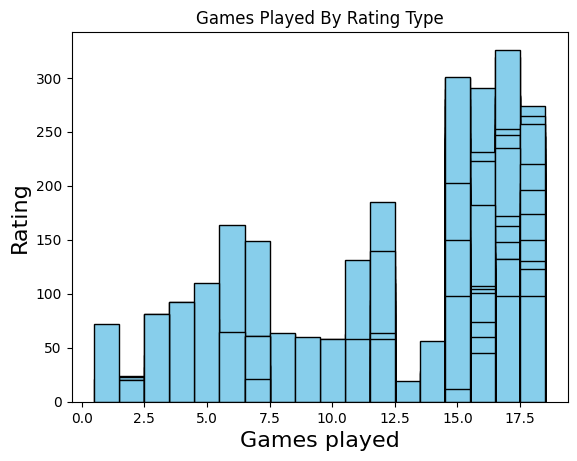

In [77]:
plt.bar(
    ratAndGames["rating"],
    ratAndGames["total_games"],
    linewidth = 0,
    color = "skyblue",
    edgecolor = "black",
    width = 1
)

plt.title("Games played by rating type".title())
plt.xlabel("Games played", fontsize = 16)
plt.ylabel("Rating", fontsize = 16)

plt.show()


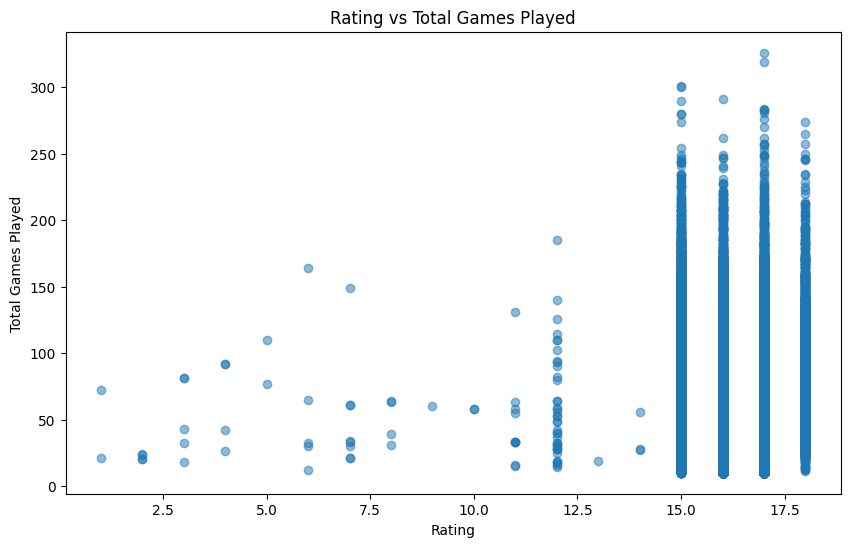

In [92]:
plt.figure(figsize=(10, 6))
plt.scatter(
    ratAndGames["rating"], 
    ratAndGames["total_games"], 
    alpha=0.5
)

plt.title("Rating vs Total Games Played")
plt.xlabel("Rating")
plt.ylabel("Total Games Played")

plt.grid(False)

plt.show()